In [1]:
import pandas as pd 
import keras
import numpy as np
from matplotlib.pyplot import *
from matplotlib import pyplot as plt
import tensorflow as tf
from sklearn import datasets, model_selection, preprocessing
tf.__version__
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import scipy.ndimage as nd
%matplotlib inline
import pylab as pl
from IPython import display
from keras.preprocessing.image import ImageDataGenerator
import itertools
import cv2

Instructions for updating:
non-resource variables are not supported in the long term


The spicies are : ('Kor', 'Gem')
Found 266 images belonging to 3 classes.
Found 216 images belonging to 2 classes.
Found 87 images belonging to 2 classes.
Step 1, Train: Loss=2015.9130, Acc=41.20%| Val: Loss=12123.0518, Acc=45.98%
Step 2, Train: Loss=9313.5527, Acc=58.80%| Val: Loss=1945.2135, Acc=45.98%
Step 3, Train: Loss=1533.9658, Acc=58.80%| Val: Loss=2515.3831, Acc=54.02%
Step 4, Train: Loss=3199.8816, Acc=41.20%| Val: Loss=3144.8577, Acc=45.98%
Step 5, Train: Loss=2456.8770, Acc=58.80%| Val: Loss=101.3502, Acc=59.77%
Step 6, Train: Loss=126.0549, Acc=47.22%| Val: Loss=3140.6553, Acc=45.98%
Step 7, Train: Loss=2460.3767, Acc=58.80%| Val: Loss=173.8171, Acc=60.92%
Step 8, Train: Loss=176.7330, Acc=68.98%| Val: Loss=833.9583, Acc=54.02%
Step 9, Train: Loss=1058.5837, Acc=41.20%| Val: Loss=1453.0715, Acc=45.98%
Step 10, Train: Loss=1170.6959, Acc=58.80%| Val: Loss=4.5589, Acc=91.95%
Step 11, Train: Loss=11.3272, Acc=89.81%| Val: Loss=9.5146, Acc=94.25%
Step 12, Train: Loss=11.8651, 

C:\Users\Elisheva\AppData\Local\Temp/ipykernel_6204/1149666265.py:196: UserWarning: `model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(


2/2 [==============================] - ETA: 0s - batch: 0.5000 - size: 266.0000 - loss: 12.0695 - acc: 0.4060     

C:\Users\Elisheva\anaconda3\lib\site-packages\keras\engine\training_v1.py:2057: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


2/2 [==============================] - 232s 156s/step - batch: 0.5000 - size: 266.0000 - loss: 12.0695 - acc: 0.4060 - val_loss: -2.8691 - val_acc: 0.2899 - lr: 0.0010
Epoch 2/3
2/2 [==============================] - ETA: 0s - batch: 0.5000 - size: 266.0000 - loss: 15.3642 - acc: 0.4774    
Epoch 2: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
2/2 [==============================] - 160s 160s/step - batch: 0.5000 - size: 266.0000 - loss: 15.3642 - acc: 0.4774 - val_loss: -1.1638 - val_acc: 0.2899 - lr: 0.0010
Epoch 3/3
2/2 [==============================] - ETA: 0s - batch: 0.5000 - size: 266.0000 - loss: 5.9180 - acc: 0.4060    
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
2/2 [==============================] - 162s 161s/step - batch: 0.5000 - size: 266.0000 - loss: 5.9180 - acc: 0.4060 - val_loss: -0.8435 - val_acc: 0.2899 - lr: 5.0000e-04
Found 138 images belonging to 3 classes.


C:\Users\Elisheva\AppData\Local\Temp/ipykernel_6204/1149666265.py:221: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  pred = model.predict_generator(val_gen,
C:\Users\Elisheva\anaconda3\lib\site-packages\keras\engine\training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


The pred is: [0 0 0 ... 0 0 0]
The spicies are : ('Kor', 'Pila')
Found 266 images belonging to 3 classes.
Found 177 images belonging to 2 classes.
Found 91 images belonging to 2 classes.
Step 1, Train: Loss=2002.7346, Acc=71.75%| Val: Loss=1299.8872, Acc=56.04%
Step 2, Train: Loss=2050.8108, Acc=28.25%| Val: Loss=9997.2764, Acc=43.96%
Step 3, Train: Loss=5080.7891, Acc=71.75%| Val: Loss=4442.7871, Acc=43.96%
Step 4, Train: Loss=2270.9399, Acc=71.75%| Val: Loss=1234.6096, Acc=43.96%
Step 5, Train: Loss=647.0294, Acc=71.75%| Val: Loss=553.7238, Acc=56.04%
Step 6, Train: Loss=839.4909, Acc=28.25%| Val: Loss=4074.0525, Acc=43.96%
Step 7, Train: Loss=2079.5203, Acc=71.75%| Val: Loss=1744.8318, Acc=43.96%
Step 8, Train: Loss=899.7042, Acc=71.75%| Val: Loss=177.1847, Acc=51.65%
Step 9, Train: Loss=101.8457, Acc=74.01%| Val: Loss=365.9597, Acc=56.04%
Step 10, Train: Loss=533.6652, Acc=28.25%| Val: Loss=2011.5895, Acc=43.96%
Step 11, Train: Loss=1031.3684, Acc=71.75%| Val: Loss=719.1487, Acc=43

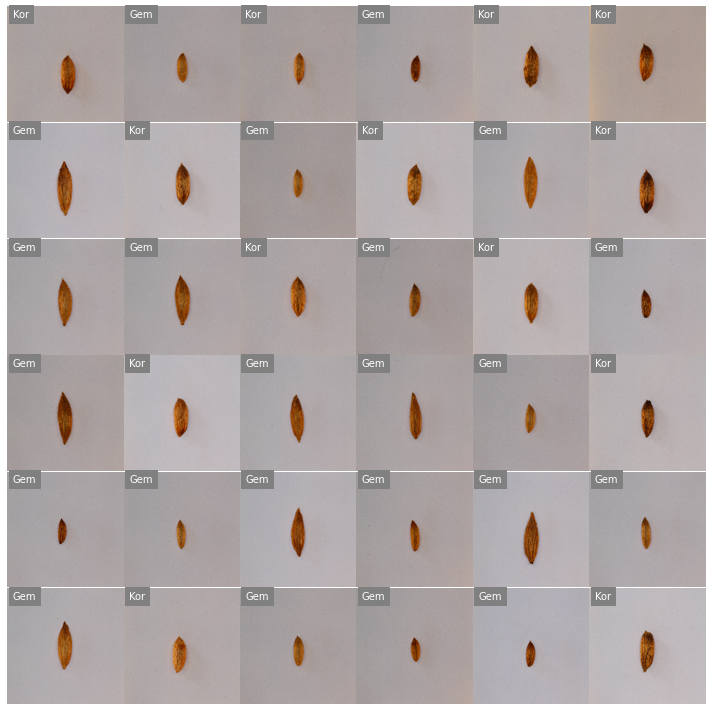

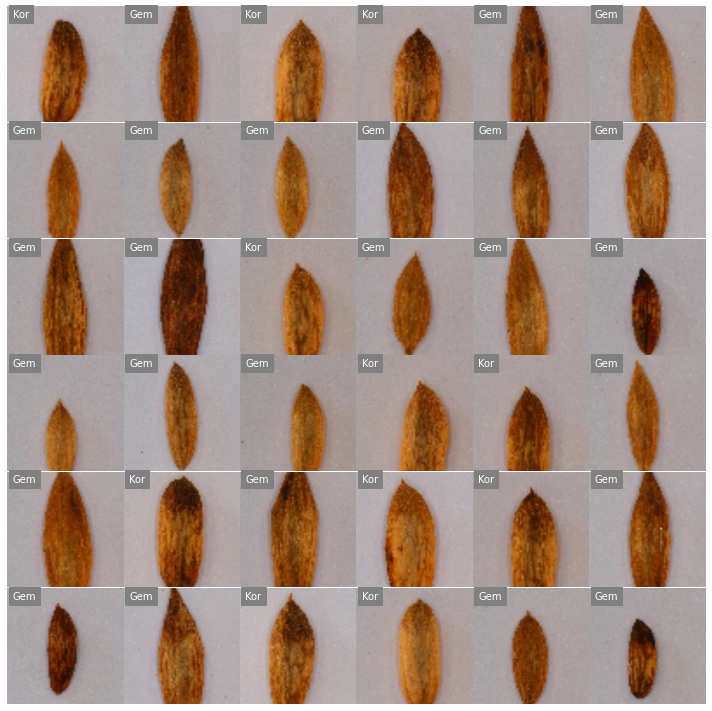

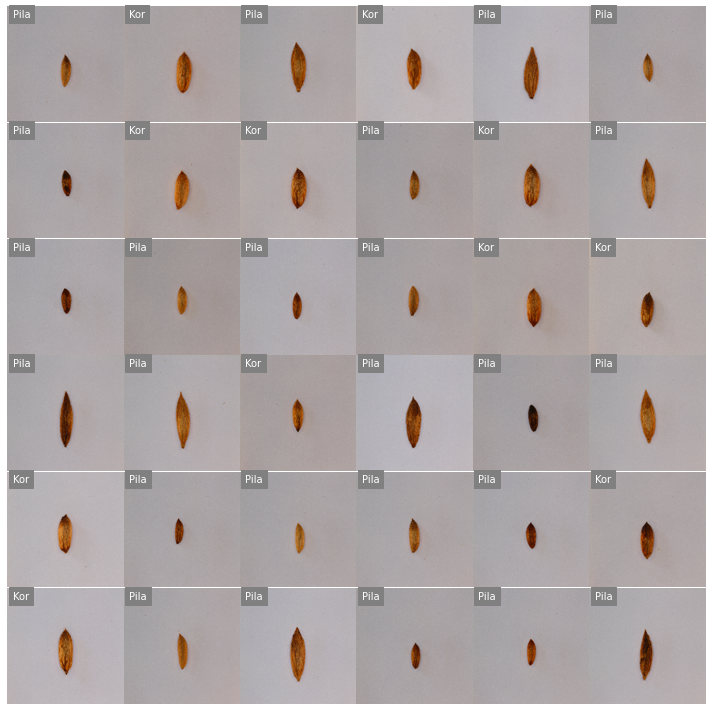

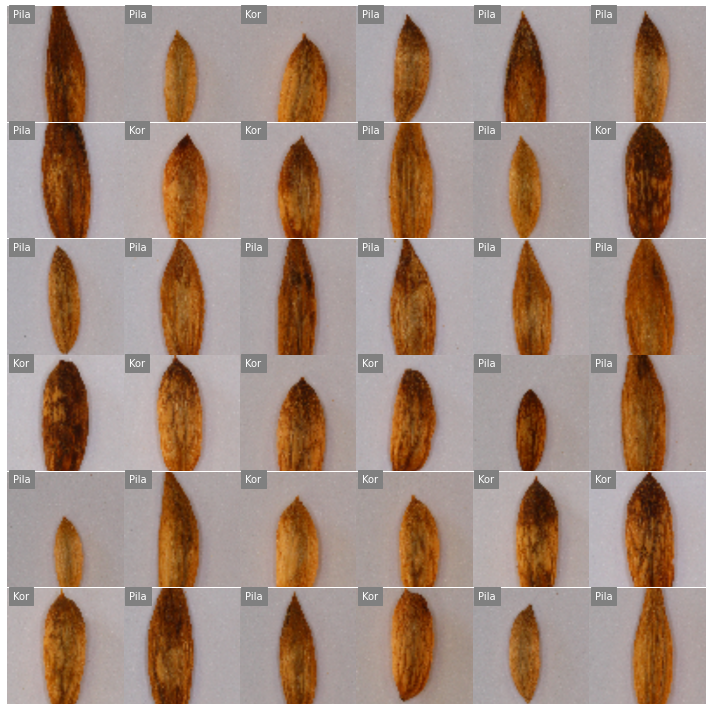

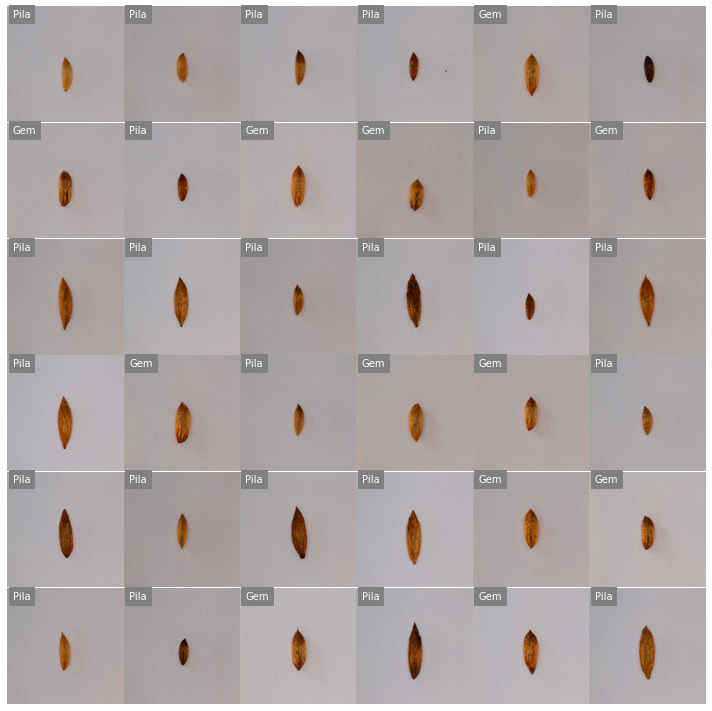

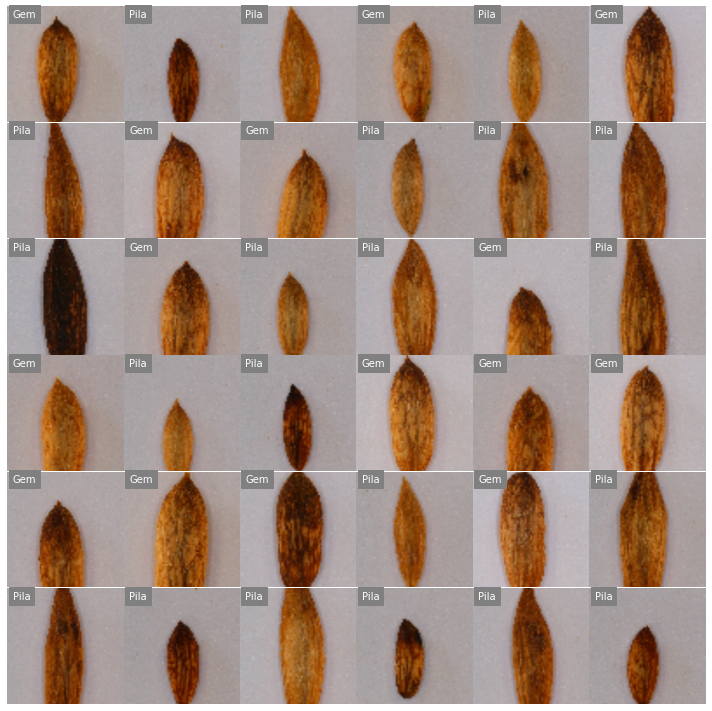

In [2]:
IMSIZE = [224,224]
BATCH = 500 # 32
dvc_path ="C:/Users/Elisheva/anaconda3/Gilat"
split_sizes = {"train": 1000, "validation":1000, "test":1000}
datagen = ImageDataGenerator(rescale=1/255)
a = ''
b = ''
list_models = []


def plot_images(x, y,**kwargs):
    global a, b
    a = pair[0]
    b = pair[1]
    n_pix = int(np.sqrt(np.prod(x.shape[1:3]))) #assumes images are square
    im_indices = np.random.choice(x.shape[0], 36, replace=False) #Pick 36 images randomaly without sorting
    fig, axes = subplots(nrows=6,ncols=6, figsize=(10,10), sharex=True, sharey=True, frameon=False)
    for i,ax in enumerate(axes.flat):
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        curr_i = im_indices[i]
        ax.imshow(x[curr_i].reshape(n_pix,n_pix, 3), aspect="auto", **kwargs)
        if y[curr_i]==0:
            ax.text(10,20,pair[0], fontdict={"backgroundcolor": "gray","color": "white" })
        else:
              ax.text(10,20,pair[1], fontdict={"backgroundcolor": "gray","color": "white" })
        #ax.set_title(title)
        ax.axis('off')
    plt.tight_layout(h_pad=0, w_pad=0)
    
def get_image(path):
    img = cv2.imread(path)
    img = cv2.resize(img, (224, 224))
    img = img.reshape([1,224,224,3]) 
    return img    

def build_model(pair, list_models):
    datagen = ImageDataGenerator(rescale=1/255)
    plot_gen = datagen.flow_from_directory(
    directory=dvc_path+"/kor_gem_pila/train",
    target_size=IMSIZE,
    batch_size=36,
    class_mode='binary',
    )   
    x,y = next(plot_gen)
    
    plot_images(x, y,interpolation="spline16")
    
    TF_IMSIZE = [50,50]
    datagen = ImageDataGenerator(rescale=1/255,zoom_range=[0.3,0.3]) #samplewise_center=True, samplewise_std_normalization=True)
    train_gen = datagen.flow_from_directory(
        directory=dvc_path+"/kor_gem_pila/train",
        target_size=TF_IMSIZE,
        batch_size=BATCH,
        classes=[a,b]) 
    val_gen = datagen.flow_from_directory(
        directory=dvc_path+"/kor_gem_pila/validation",
        target_size=TF_IMSIZE,
        batch_size=1000,
        classes=[a,b])

    # Network Parameters
    n_hidden_1 = 64 # 1st layer number of neurons
    n_hidden_2 = 32 # 2nd layer number of neurons
    num_input = np.prod(TF_IMSIZE)*3 #
    num_classes = 2 # 
    X = tf.placeholder("float", [None] + TF_IMSIZE + [3])
    Y = tf.placeholder("float", [None, num_classes])

    # placing them in a dictionary is helpful for keeping organized
    # but these are just python variables.
    weights = {
            'h1': tf.Variable(tf.random_normal([num_input, n_hidden_1])),
            'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
            'out': tf.Variable(tf.random_normal([n_hidden_2, num_classes]))
        }

    biases = {
        'b1': tf.Variable(tf.random_normal([n_hidden_1])),
        'b2': tf.Variable(tf.random_normal([n_hidden_2])),
        'out': tf.Variable(tf.random_normal([num_classes]))
    }

    X_flat = tf.reshape(X, [tf.shape(X)[0], -1])

    # Now we define the operations we'll use to construct
    # the output from our inputs and trainable parameters

    # First hidden fully connected layer
    layer_1 = tf.matmul(X_flat, weights['h1']) + biases['b1']

    # Second hidden fully connected layer
    layer_2 = tf.matmul(layer_1, weights['h2']) + biases['b2']

    # Output fully connected layer with a neuron for each class
    logits = tf.matmul(layer_2, weights['out']) + biases['out']

    tf.disable_v2_behavior()

    learning_rate = 0.001

    # Define the loss and optimizer
    # recall that cross-entropy loss is what we use for most categorization problems
    loss = tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits, labels=Y)
    loss_op = tf.reduce_mean(loss)

    # The optimizer uses gradient descent and the backprop algorithm
    # Most of these are just variations on Stochastic Gradient Descent
    optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
    train_op = optimizer.minimize(loss_op)

    # Evaluate model (with test logits, for dropout to be disabled)
    correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(Y, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

    # Initialize the variables (i.e. assign their default value)
    init = tf.global_variables_initializer()

    # Parameters
    num_steps = 25 # roughly 10 epochs
    display_step = 1#int(num_steps//20)


    # Start training
    with tf.Session() as sess:

        # Run the initializer
        sess.run(init)
        loss = []
        acc = []

        for step in range(1, num_steps+1):
            batch_x, batch_y = next(train_gen)
            # Run optimization op (backprop)
            _, train_loss, train_acc = sess.run([train_op, loss_op, accuracy], feed_dict={X: batch_x, Y: batch_y})
            loss.append(train_loss)
            acc.append(train_acc)
            if step % display_step == 0:
                x_val, y_val = next(val_gen)
                val_loss, val_acc = sess.run([loss_op, accuracy], feed_dict={X: x_val, Y: y_val})
                print(f"Step {step}, Train: Loss={np.mean(loss):.4f}, Acc={np.mean(acc):.2%}"
                      f"| Val: Loss={val_loss:.4f}, Acc={val_acc:.2%}")
                loss = []
                acc = []
        print("Optimization Finished!")
        
     
    TF_IMSIZE = IMSIZE

    train_gen = datagen.flow_from_directory(
        directory=dvc_path+"/kor_gem_pila/train",
        target_size=TF_IMSIZE,
        batch_size=BATCH,
        class_mode='binary'
    )
    

    val_gen = datagen.flow_from_directory(
        directory=dvc_path+"/kor_gem_pila/validation",
        target_size=TF_IMSIZE,
        batch_size=BATCH,
        class_mode='binary'
    )
    
    # Create a Keras Sequential model
    # We do this by passing a list of layers to the Sequential model

    model = keras.Sequential(
        [
            keras.layers.InputLayer(input_shape=TF_IMSIZE+[3]),
            keras.layers.Flatten(),
            keras.layers.Dense(64, activation="relu", name="layer1"),
            keras.layers.Dense(32, activation="relu", name="layer2"),
            keras.layers.Dense(1, activation="sigmoid")
            #keras.layers.Dense(num_classes, activation="softmax") ########
            #if binary write 'sigmoid' and if molti-class write softmax $$$$$$$$$$$$
        ]
    )

    model.summary() #summary provides an at-a-glance look at the model we've built
    
    # Compile the network
    model.compile(
        loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    
        #loss = binary_crossentropy/sparse_categorical_crossentropy # optimizer = adam

    steps = 1000 / BATCH
    callbacks = [
        keras.callbacks.ReduceLROnPlateau(
            factor=.5, patience=1, verbose=1, min_lr=1e-8),
        keras.callbacks.EarlyStopping(patience=5, verbose=1),
    ]

    model.fit_generator(
        generator = train_gen, 
        steps_per_epoch = steps,
        validation_data = val_gen,
        validation_steps = steps,
        callbacks = callbacks,
        epochs = 3)
    
    
    test_gen = datagen.flow_from_directory(
    directory=dvc_path+"/kor_gem_pila/test",
    target_size=IMSIZE,
    color_mode = "rgb",
    batch_size=36,
    class_mode='binary'
    )
    x,y = next(test_gen)
    
    plot_images(x, y, interpolation = "spline16")
    #model.add(Lambda(lambda x: K.cast(K.argmax(x), dtype='float32'), name='y_pred')) #########
    model.save(f'C:/Users/Elisheva/anaconda3/Gilat/Elisheva{pair[0]}{pair[1]}')
    list_models.append(model)
    
    val_gen.reset()
    
    pred = model.predict_generator(val_gen,
    steps=36,
    verbose=1)
        
    predicted_class_indices=np.argmax(pred,axis=1)
    print(f'The pred is: {predicted_class_indices}')
    

spicies = ["Kor","Gem","Pila"]
pairs = list(itertools.combinations(spicies,2)) 

for pair in pairs:
    print(f'The spicies are : {pair}')
    build_model(pair, list_models) 


In [15]:
species_scoring ={
    "Kor" : 0 ,
    "Gem" : 0 ,
    "Pila" : 0
} 

for model in list_models: 
    result = (model.predict(get_image(dvc_path+"/kor_gem_pila/test/Pila/IMG_7666.jpg"))> 0.5).astype("int32") 
    classes = np.argmax(result,axis=1)
    print(f'The result is: {classes}')
    
    #result = (model.predict(get_image(dvc_path+"/kor_gem_pila/test/Pila/IMG_7666.jpg")) > 0.5).astype("int32") 
    #classes = np.argmax(result,axis=1)
    #print(f'The result is: {classes}')
    
    #y_pred = model.predict(get_image(dvc_path+"/kor_gem_pila/test/Pila/IMG_7666.jpg"))
    #print(np.round(y_pred).astype(int))
    
    #print((model.predict(get_image(dvc_path+"/kor_gem_pila/test/Pila/IMG_7666.jpg"))> 0.5)*1)
    
    #print(np.argmax(model.predict(get_image(dvc_path+"/kor_gem_pila/test/Pila/IMG_7666.jpg")),axis=1))
    
     #print(model.predict_classes(get_image(dvc_path+"/kor_gem_pila/test/Pila/IMG_7666.jpg")))
    
    
    

The result is: [0]
The result is: [0]
The result is: [0]


In [16]:
a = [[1,2,3],[4,99,6]]
print(np.argmax(a, axis=1)) #colon 

if result == 0:
        species = pairs[model][0]
        x = species_scoring[species]
        x += 1
        species_scoring[species] = x
        
elif result == 1:
        species = pairs[model][1]
        x = species_scoring[species]
        x += 1
        species_scoring[species] = x
    
max_key = max(species_scoring, key=species_scoring.get)
print(f'The dictionary is : {species_scoring}')
print(f'The species is : {max_key} ')
        
    #print(model.predict_classes(get_image(dvc_path+"/kor_gem_pila/test/Kor/Kor.IMG_7659.jpg")))

   

[2 1]


TypeError: list indices must be integers or slices, not Sequential

In [ ]:
species_scoring ={
    "Kor" : 0 ,
    "Gem" : 0 ,
    "Pila" : 2
}
max_key = "Pila"
print(f'The dictionary is : {species_scoring}')
print(f'The species is : {max_key} ')